In [ ]:
#pip install pyngrok

In [ ]:
#pip install mlflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import mlflow
import mlflow.sklearn

#import warnings
#arnings.filterwarnings('ignore')

# Problem Formlation

**BCG's** Client called **PowerCo** a major **gas** and **electricity** utility that supplies to small and medium sized enterprises, the energy market has had a lot of change in recent years and there are more options than ever for customers to choose from, sothat **PowerCo** are concerned about their customers leaving for better offers from other energy providors.

When a customer leaves to use another service providor that's called **"Churn"**

This becoming a big issue for **PowerCo** and they have engaged **BCG** to help diagnose **the reason why** their customers are **"Churning"**

### Loading Dataset

In [ ]:
df = pd.read_csv('/content/clean_data_after_eda.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

# Data Preprocessing

#### Categorical and Numeric Features Separation

In [ ]:
df_num = df.select_dtypes(include=['int64','float64']).columns.to_list()
df_cat = df.select_dtypes(include=['object']).columns.to_list()

#### Checking for Null Values

In [ ]:
# Check for Nulls
df.isnull().sum()

,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


#### Checking for Duplicates


In [ ]:
df.duplicated().sum()

np.int64(0)

#### Checking For and Handling Outliers

In [ ]:
def outlier_counts(data, features):
  IQR = data[features].quantile(0.75) - data[features].quantile(0.25)
  lower_bond = data[features].quantile(0.25) - 1.5 * IQR
  upper_bond = data[features].quantile(0.75) - 1.5 * IQR
  for f in features:
    IQR = data[f].quantile(0.75) - data[f].quantile(0.25)
    lower_bond = data[f].quantile(0.25) - 1.5 * IQR
    upper_bond = data[f].quantile(0.75) - 1.5 * IQR
    u = data[data[f] > upper_bond][f].value_counts()
    l = data[data[f] < lower_bond][f].value_counts()
    print(u)

# Checking The Balance of The Target

In [ ]:
c0 = (df['churn'].value_counts()).iloc[0]
c1 = (df['churn'].value_counts()).iloc[1]
p_c0 = (c0 / (c0 + c1))*100
p_c1 = (c1 / (c0 + c1))*100
print(f"Class 0 Not Churned: {p_c0}%")
print(f"Class 1 Churned: {p_c1}%")

Class 0 Not Churned: 90.28481445981103%
Class 1 Churned: 9.715185540188962%


<Axes: xlabel='churn', ylabel='count'>

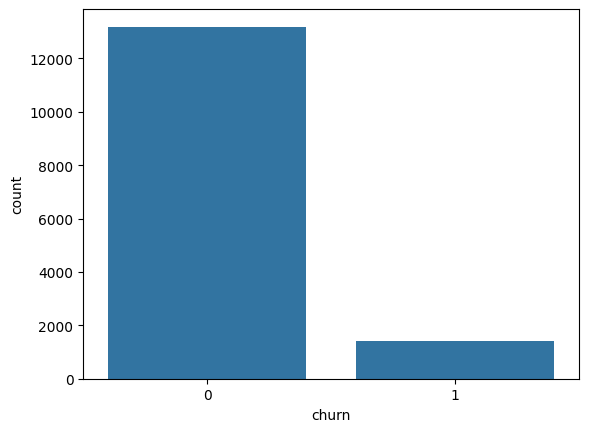

In [ ]:
sns.countplot(x=df['churn'])

#### So we have an imbalance Target (**90-10%**) so that we will suggest to use such a method like **SMOTE** or **Random Under Sampler** for imbalanced binary classification

In [ ]:
df['churn'].value_counts()

,count
churn,
0,13187
1,1419


# Feature Engineering

In [ ]:
def feature_engineering(data):
  data['diff_year_price_1'] = data['var_year_price_off_peak_var'] - data['var_year_price_mid_peak_var']
  data['diff_year_price_2'] = data['var_year_price_off_peak_var'] - data['var_year_price_peak_var']
  data['diff_year_price_3'] = data['var_year_price_off_peak_fix'] - data['var_year_price_mid_peak_fix']
  data['diff_year_price_4'] = data['var_year_price_off_peak'] - data['var_year_price_mid_peak']
  return data

In [ ]:
df = feature_engineering(df)

#### Correlation between Features

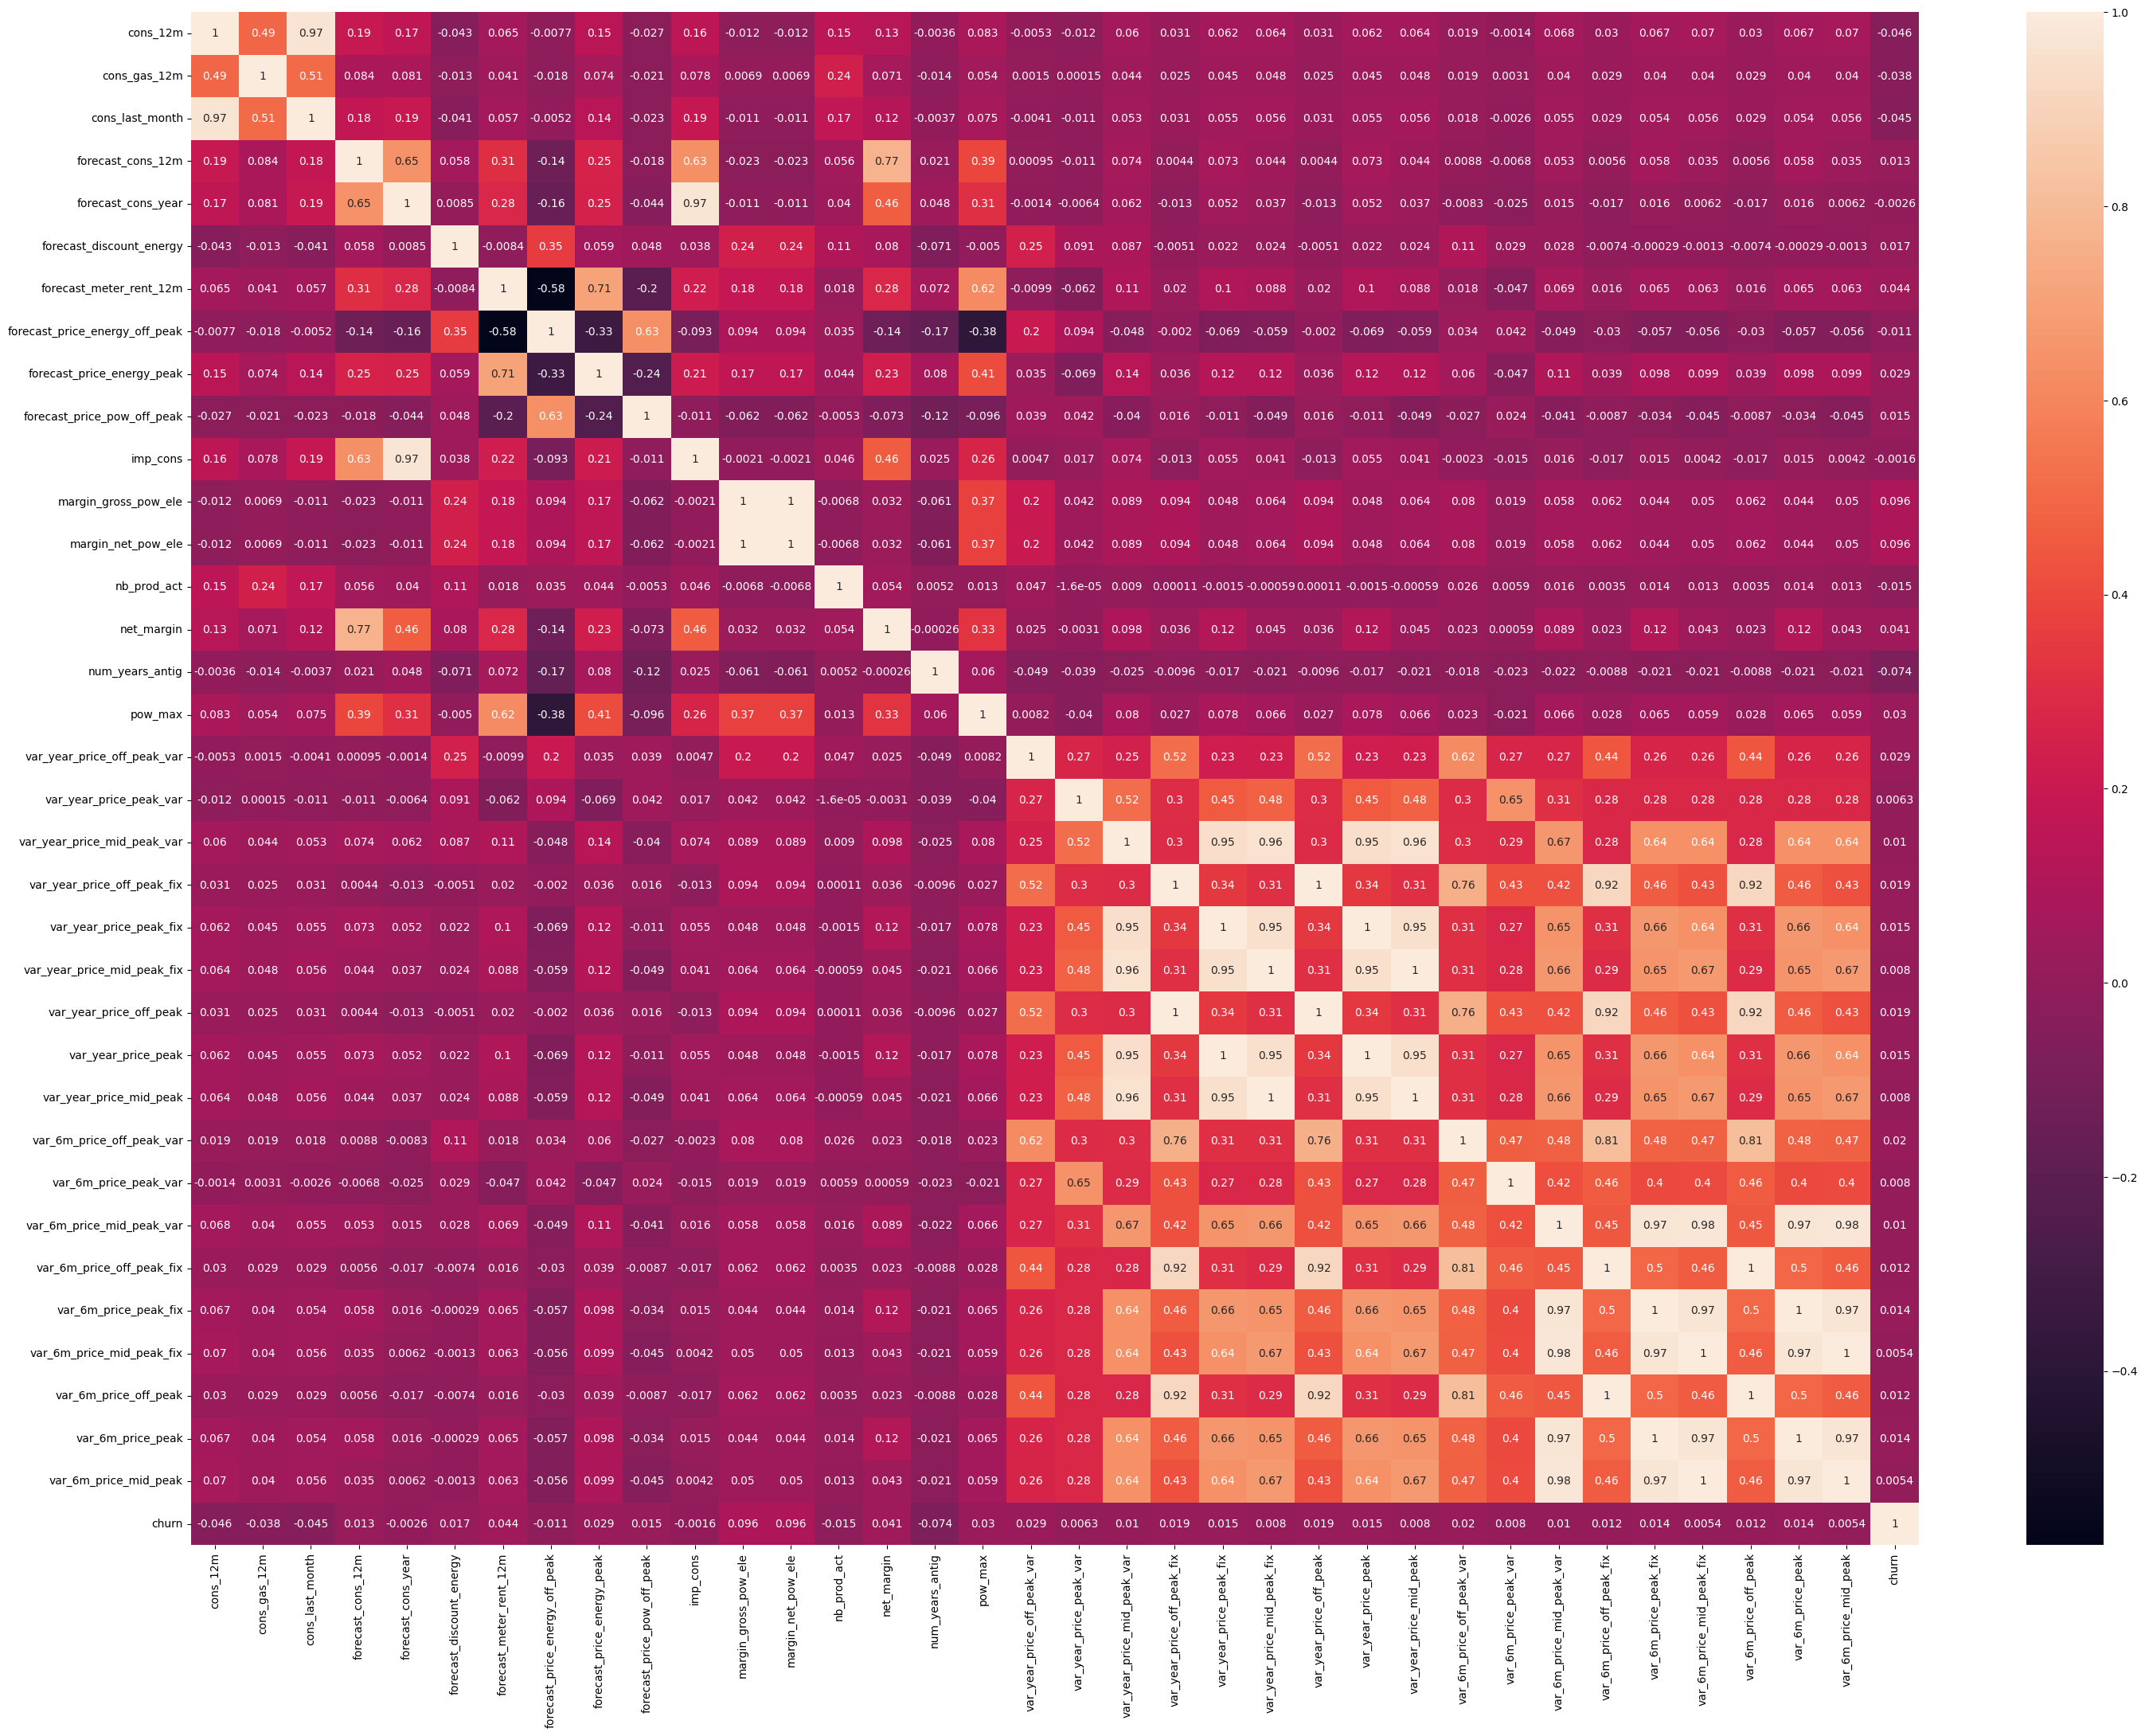

In [ ]:
corr = df[df_num].corr()

plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True)
plt.show()

#### Corrlation of each Feature with The Target Variable "Churn"

In [ ]:
df[df_num].corr()['churn'].sort_values(ascending=False)

,churn
churn,1.000000
margin_net_pow_ele,0.095772
margin_gross_pow_ele,0.095725
forecast_meter_rent_12m,0.044245
net_margin,0.041135
pow_max,0.030362
forecast_price_energy_peak,0.029315
var_year_price_off_peak_var,0.028646
var_6m_price_off_peak_var,0.019628
var_year_price_off_peak,0.018930


# Encoding Categorical Features

In [ ]:
df[df_cat].nunique()

,0
id,14606
channel_sales,8
date_activ,1796
date_end,368
date_modif_prod,2129
date_renewal,386
has_gas,2
origin_up,6


In [ ]:
def EncodingCategoricalFeatures(data,sc=0, test=False):
  cate = ['channel_sales','origin_up']
  data['has_gas'] = data['has_gas'].map({'t':1,'f':0})
  if test:
    encoded_arr = sc.transform(data[cate])
  else:
    sc = OneHotEncoder(sparse_output=False)
    encoded_arr = sc.fit_transform(data[cate])
  encoded_df = pd.DataFrame(encoded_arr, columns=sc.get_feature_names_out(cate))
  result = pd.concat([data.drop(columns=cate), encoded_df], axis=1)
  return result, sc

In [ ]:
df, scaler_sc = EncodingCategoricalFeatures(df)

# Feature Selection

In [ ]:
final_features = df.select_dtypes(include=['int64','float64']).columns.to_list()

In [ ]:
final_features.remove('churn')

In [ ]:
#!pip install scikit-learn==1.5.2 --force-reinstall

# Modeling

#### Splitting Dataset into Training and Testset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df[final_features],df['churn'], test_size=0.2, stratify=df['churn'], random_state=42)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((11684, 54), (11684,), (2922, 54), (2922,))

#### Handling Imbalanced Target

In [ ]:
r = 2270 / 1135

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="all", random_state=42)
x1, y1 = smote.fit_resample(x_train,y_train)

In [ ]:
params = {
    "n_estimators": 200
}
rf = RandomForestClassifier(n_estimators=params['n_estimators'])
rf.fit(x1,y1)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_rf_sm = rf.predict(x_test)

In [ ]:
from xgboost import XGBClassifier
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    #"scale_pos_weight": r,
    "learning_rate": 0.01,
    "max_depth": 6,
    "n_estimators": 200,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    #scale_pos_weight=r,  # Use this if not using SMOTE
    learning_rate=0.01,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(x1, y1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb_sm = xgb.predict(x_test)

Random Under Sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy=0.64, random_state=42)
x2, y2 = undersampler.fit_resample(x_train,y_train)

In [ ]:
params = {
    "n_estimators": 1000
}
rf = RandomForestClassifier(n_estimators=params['n_estimators'])
rf.fit(x2,y2)

RandomForestClassifier(n_estimators=1000)

In [ ]:
from xgboost import XGBClassifier
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    #"scale_pos_weight": r,
    "learning_rate": 0.01,
    "max_depth": 6,
    "n_estimators": 200,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42
}
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    #scale_pos_weight=r,  # Use this if not using SMOTE
    learning_rate=0.01,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(x2, y2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_rf_us = rf.predict(x_test)

In [ ]:
y_pred_xgb_us = xgb.predict(x_test)

# Model Evaluation

In [ ]:
def get_metrics(y_true, y_pred):
    cm = metrics.confusion_matrix(y_true, y_pred).ravel()
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)

    return {
        'True Negatives': cm[0],
        'False Positives': cm[1],
        'False Negatives': cm[2],
        'True Positives': cm[3],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Overall Accuracy': accuracy
    }

# Dictionary of models and predictions
models_predictions = {
    'Random Forest (SMOTE)': y_pred_rf_sm,
    'Random Forest (Undersampling)': y_pred_rf_us,
    'XGBoost (SMOTE)': y_pred_xgb_sm,
    'XGBoost (Undersampling)': y_pred_xgb_us
}

# Compute metrics for each model and store results in a list
metrics_results = [get_metrics(y_test, y_pred) for y_pred in models_predictions.values()]

# Create a DataFrame to compare all metrics
metrics_df = pd.DataFrame(metrics_results, index=models_predictions.keys())

In [ ]:
# Display the table
metrics_df

,True Negatives,False Positives,False Negatives,True Positives,Precision,Recall,F1-Score,Overall Accuracy
Random Forest (SMOTE),2614,24,256,28,0.538462,0.098592,0.166667,0.904175
Random Forest (Undersampling),2202,436,152,132,0.232394,0.464789,0.309859,0.798768
XGBoost (SMOTE),2483,155,245,39,0.201031,0.137324,0.163180,0.863107
XGBoost (Undersampling),2340,298,187,97,0.245570,0.341549,0.285714,0.834018


#### MLOps

The code for using MLFlow to track experiments is commented for use. To utilize it, simply pass or edit the prediction data name "y_pred_rf_us" based on the model you train. Then, pass it to compute all the metrics below, and the results will be saved in MLFlow. Additionally, you can adjust the experiment name and run name based on your preference, but I have written it based on the best model chosen.

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_rf_us).ravel()

In [ ]:
eval = metrics.classification_report(y_test,y_pred_rf_us)
eval_dict = metrics.classification_report(y_test,y_pred_rf_us,output_dict=True)

In [ ]:
Accuracy = metrics.accuracy_score(y_test, y_pred_rf_us)
Precision = metrics.precision_score(y_test, y_pred_rf_us)
Recall = metrics.recall_score(y_test, y_pred_rf_us)
f1 = metrics.f1_score(y_test, y_pred_rf_us)

In [ ]:
print(eval)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2638
           1       0.22      0.44      0.29       284

    accuracy                           0.79      2922
   macro avg       0.58      0.64      0.59      2922
weighted avg       0.86      0.79      0.82      2922



In [ ]:
print(f"Accuracy: {Accuracy}%")
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")
print(f"f1_score: {f1}")

Accuracy: 0.7915811088295688%
Precision: 0.21837088388214904
Recall: 0.44366197183098594
f1_score: 0.2926829268292683


# Important
## You must pass the NgrokTunnel link to mlflow.set_tracking_uri

In [ ]:
from pyngrok import ngrok
# My Token from My ngork Account
!ngrok authtoken 2sUEGoeO25mq7WTZeV0Fha7wxQP_3EpouzLQo5LKTkPEdPscQ

get_ipython().system_raw("mlflow server --backend-store-uri sqlite:///mlflow.db --host 0.0.0.0 --port 5000 &")

url = ngrok.connect(5000, "http")
print(f"MLflow Tracking URI: {url}")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
MLflow Tracking URI: NgrokTunnel: "https://9ad8-34-106-5-36.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
if mlflow.active_run():
    mlflow.end_run()

In [ ]:
mlflow.set_tracking_uri("https://9ad8-34-106-5-36.ngrok-free.app")
mlflow.set_experiment('CC_RF')

with mlflow.start_run(run_name="RF_UnderSampling"):
  mlflow.log_params(params)
  mlflow.log_params({
        "sampling_method": "RandomUnderSampling",
        "sampling_strategy": 0.64
    })
  mlflow.log_metrics({
      "True positives": tp,
      "False positives": fp,
      "True negatives": tn,
      "False negatives": fn,
      "Overall accuracy": eval_dict['accuracy'],
      "precision of class 1": Precision,
      "recall of class 1": Recall,
      "f1-scoreof class 1": eval_dict['weighted avg']['f1-score']
  })


2025/02/06 17:28:12 INFO mlflow.tracking.fluent: Experiment with name 'CC_RF' does not exist. Creating a new experiment.


🏃 View run RF_UnderSampling at: https://9ad8-34-106-5-36.ngrok-free.app/#/experiments/1/runs/35e7b00b864a4046806bfc9e4ede8466
🧪 View experiment at: https://9ad8-34-106-5-36.ngrok-free.app/#/experiments/1


# Selecting the Best Model From MLFlow UI
Here are the results of all Experiments and Runs

Results of Random Forest using SMOTE


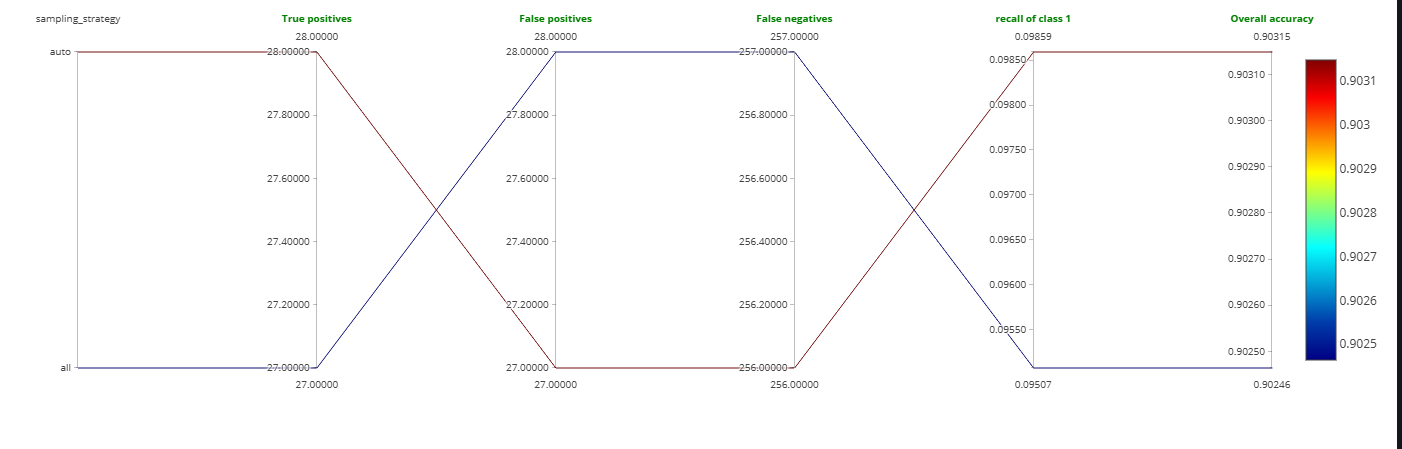

Results of Random Forest using RandomUnderSampling

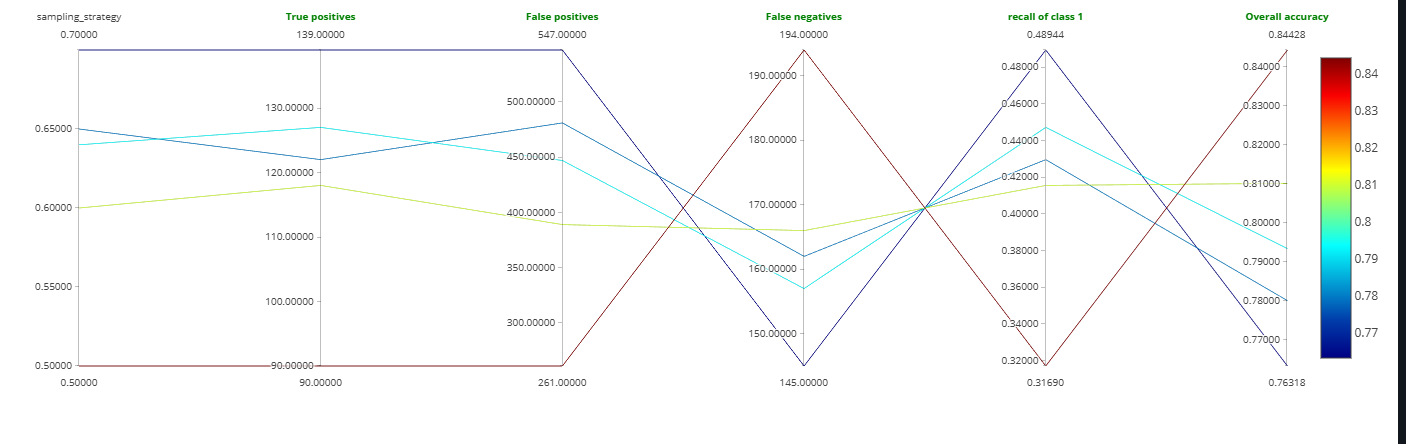

Results of XGBoost using scale_pos_weight and RandomUnderSampling

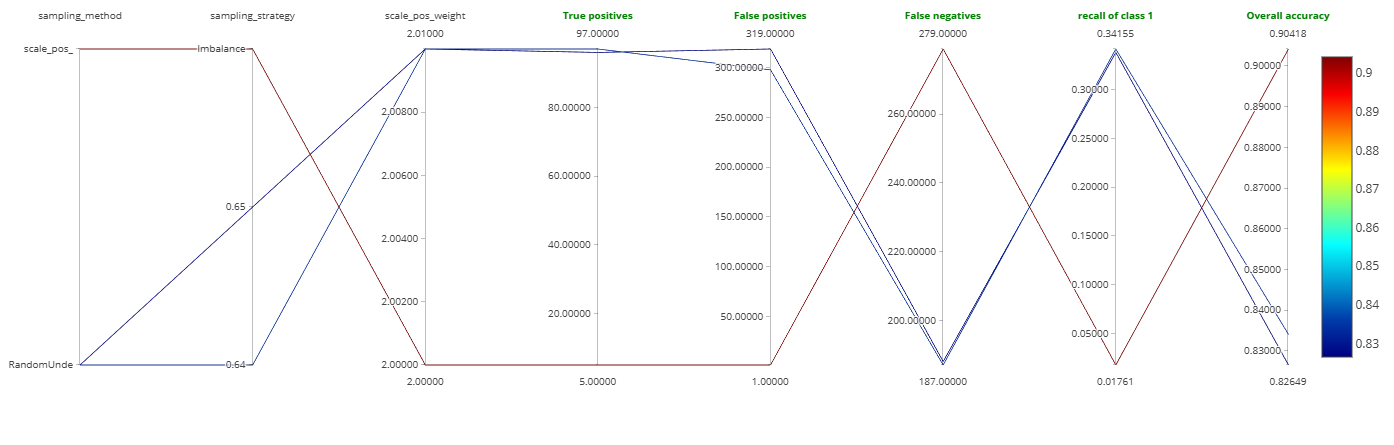

We will choose the **Random Forest (Undersampling)**, and use the Random Under Sampling method for reduce the effect of the imbalance target with sampling strategy = 0.64, as both random forest and this technique had the best results among all experiments and runs in MLFlow

In [ ]:
# Saving The Best Model
import joblib
joblib.dump(rf,'model.pkl')
joblib.dump(scaler_sc,'scaler_sc.pkl')

['scaler_sc.pkl']

In [ ]:
feature_importances = rf.feature_importances_

In [ ]:
importance_df = pd.DataFrame({
    'Feature': df[final_features].columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

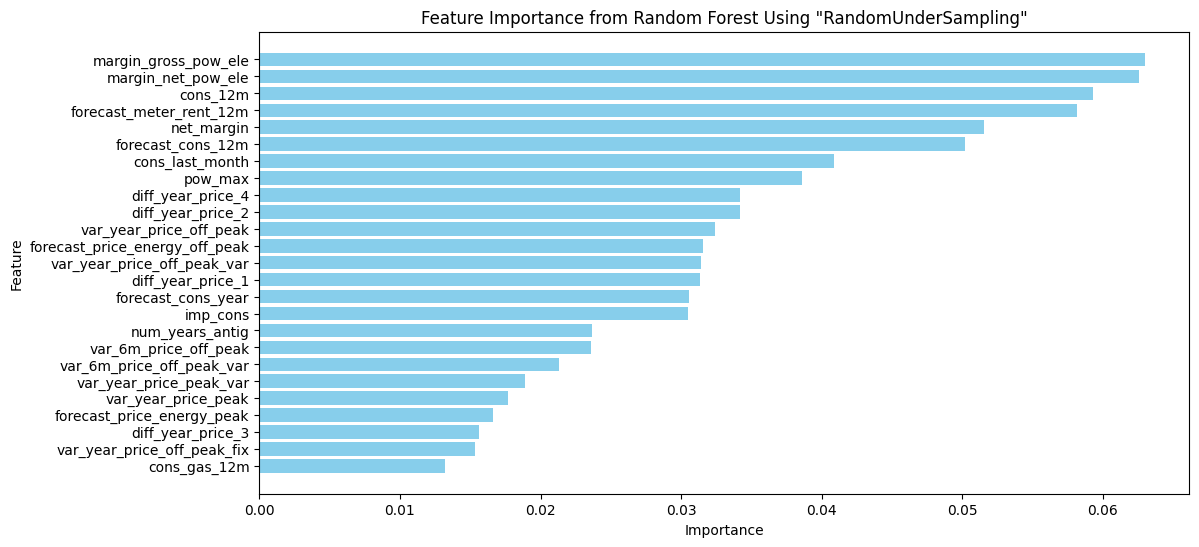

In [ ]:
# Display it
top_25_importance_df = importance_df.head(25)
plt.figure(figsize=(12, 6))
plt.barh(top_25_importance_df['Feature'], top_25_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Using "RandomUnderSampling"')
plt.gca().invert_yaxis()  # Optional: to display the most important feature at the top
plt.show()